# 지난주!

* 부산 집값, iris, HR, titanic 데이터 살펴보기  
* 데이터의 결측과 수치화
    * numerical
        * 그 특성의 평균이나 중앙값으로 채우는 것이 가장 간단
        * 다른 특성과의 관계를 살펴서 채울 수도 있음
        * feature를 줄이기 위해 새로운 feature를 생성할 수 있음
        
    * categorical 
        * 새로운 카테고리를 만드는 것이 가장 간단
        * 다른 특성과의 관계를 살펴서 채울 수도 있음
        * norminal(순서없음): one-hot encoding 혹은 특성의 데이터타입을 `categorical`로 지정
        * ordinal(순서있음): 순서가 있는 숫자 즉, 자연수로 변환
        
* 이상치(혹은 노이즈)
    * 이상치인지를 판단하려면 해당 데이터의 각 특성에 대한 이해가 중요
    * 다른 특성과의 관계를 살펴 정말 이상한 것인지 판단해야 함
    
* matplotlib, seaborn 시각화
    * 시각화는 내용 전달, 데이터의 즉각적 이해, 가설 확인 및 설정 등을 위해 필요
    * 데이터를 가장 잘 설명할 수 있는 그래프, 색상 등을 선택
    * 필요에 따라서는 자료에 설명(화살표, 텍스트 등)을 넣을 수도 있음
    * $x$축, $y$축, title은 넣는 습관을 들이는 것이 필요
    
* 상관관계
    * 두 개의 특성간의 관계를 수치화해서 볼 때 필요
    * 수치 데이터라면 피어슨 상관계수(일반적으로 말하는 상관계수는 피어슨 상관계수)
    * 순서가 있는 데이터라면 스피어만 상관계수
    * 예를 들어 수학과 영어과목 시험 점수에 대한 상관관계는 피어슨으로, 시험 석차에 대한 상관관계는 스피어만으로 분석

* 스케일링
    * 데이터의 분포 범위를 균일하게 해 주는 작업
    * 대부분의 머신러닝 모델은 스케일링에서 더 잘 학습 됨
    * 종류: min-max, standard, robust 등

* 차원축소
    * 데이터의 차원이 너무 높아지면(즉, 특성이 너무 많아지면) 학습 데이터는 잘 맞추지만 테스트 데이터에서 맞추지 못하는 과적합 현상이 발생
    * 데이터의 정보는 가지고 있으면서 차원을 줄이는 방법이 필요
    * 학습에 이용할 데이터의 차원을 줄이거나 데이터를 2D 혹은 3D로 시각화 해 보고 싶을 때 활용
    * 종류: PCA, $t$-SNE
    
**테스트 데이터의 전처리는 훈련 데이터의 정보로만 해야 함**

# 0. 라이브러리 및 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
print("library version check")
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("seaborn: ", sns.__version__)
print("matplotlib: ", mpl.__version__)
print("sklearn: ", sklearn.__version__)

library version check
numpy:  1.23.5
pandas:  1.5.1
seaborn:  0.12.1
matplotlib:  3.6.2
sklearn:  1.1.3


In [3]:
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
mpl.style.use("default")
mpl.rcParams.update({"figure.constrained_layout.use": True})

sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [4]:
df = pd.read_csv("../data/hr_data_preprocessing.csv", encoding="utf-8", index_col=0)

# 1. correlation

* numerical $\rightarrow$ pearson
* ordinal $\rightarrow$ spearman


# 2. 훈련 데이터와 테스트 데이터로 나누기

In [5]:
features = ["job_satisfaction",
            "working_hours", 
            "num_companies_worked", 
            "age", 
            "years_at_company",
            "salary_increasing_rate",
            "department_hr", 
            "department_rnd", 
            "department_sales",
            "marital_status_etc", 
            "marital_status_married", 
            "marital_status_single"]

In [6]:
x_data = df[features]
y_data = df["attrition"]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.25,
                                                    random_state = 42, 
                                                    stratify=y_data)    # label의 비율 유지

In [8]:
train_indx = x_train.index
test_indx = x_test.index

# 3. 데이터 스케일링

* test 데이터는 절대! 포함하면 안됨!!!

In [9]:
minmax_scaler = MinMaxScaler()
x_train = minmax_scaler.fit_transform(x_train)

# 주의!! fit_transform 아님!! transform임!!!
x_test = minmax_scaler.transform(x_test)

In [10]:
x_train_scaled = pd.DataFrame(x_train, columns=features, index=train_indx)
x_test_scaled = pd.DataFrame(x_test, columns=features, index=test_indx)

train = x_train_scaled.merge(y_train, left_index=True, right_index=True)
test = x_test_scaled.merge(y_test, left_index=True, right_index=True)

In [11]:
# 저장
# train.to_csv("../data/hr_train_scaling.csv", encoding="utf-8")
# test.to_csv("../data/hr_test_scaling.csv", encoding="utf-8")

# 4. 테스트 데이터를 포함한 스케일링

* 현업에서 테스트 데이터는 어떤 것이 들어올지 알 수 없음
* 따라서 모델을 학습 시키기 위한 스케일링을 할 때는 반드시 훈련 데이터의 값으로 스케일링 해야 함
* 테스트 데이터는 훈련 데이터의 대표값으로 변환해야 함

In [12]:
df_scaling = pd.read_csv("../data/scaling_data.csv",
                 encoding="utf-8",
                 index_col = 0)
df_scaling.head(2)

,x,y,target
0,0.8,-1.8,1
1,1.1,0.5,2


In [13]:
df_scaling.shape

(40, 3)

In [14]:
# 테스트 데이터 추가
df_scaling.loc[40] = [3, 3, 3]

In [15]:
# train, test를 같이 스케일링
minmax = MinMaxScaler()
all_scaling = minmax.fit_transform(df_scaling[["x", "y"]])

In [16]:
# train만 스케일링
minmax = MinMaxScaler()
train_scaling = minmax.fit_transform(df_scaling.iloc[:-1][["x", "y"]].values)
test_transform = minmax.transform(np.reshape(df_scaling.iloc[40][["x", "y"]].values, (1, 2)))

In [17]:
color = df_scaling["target"].replace({1: 'tab:green', 2: 'tab:green', 3:'tab:red'})

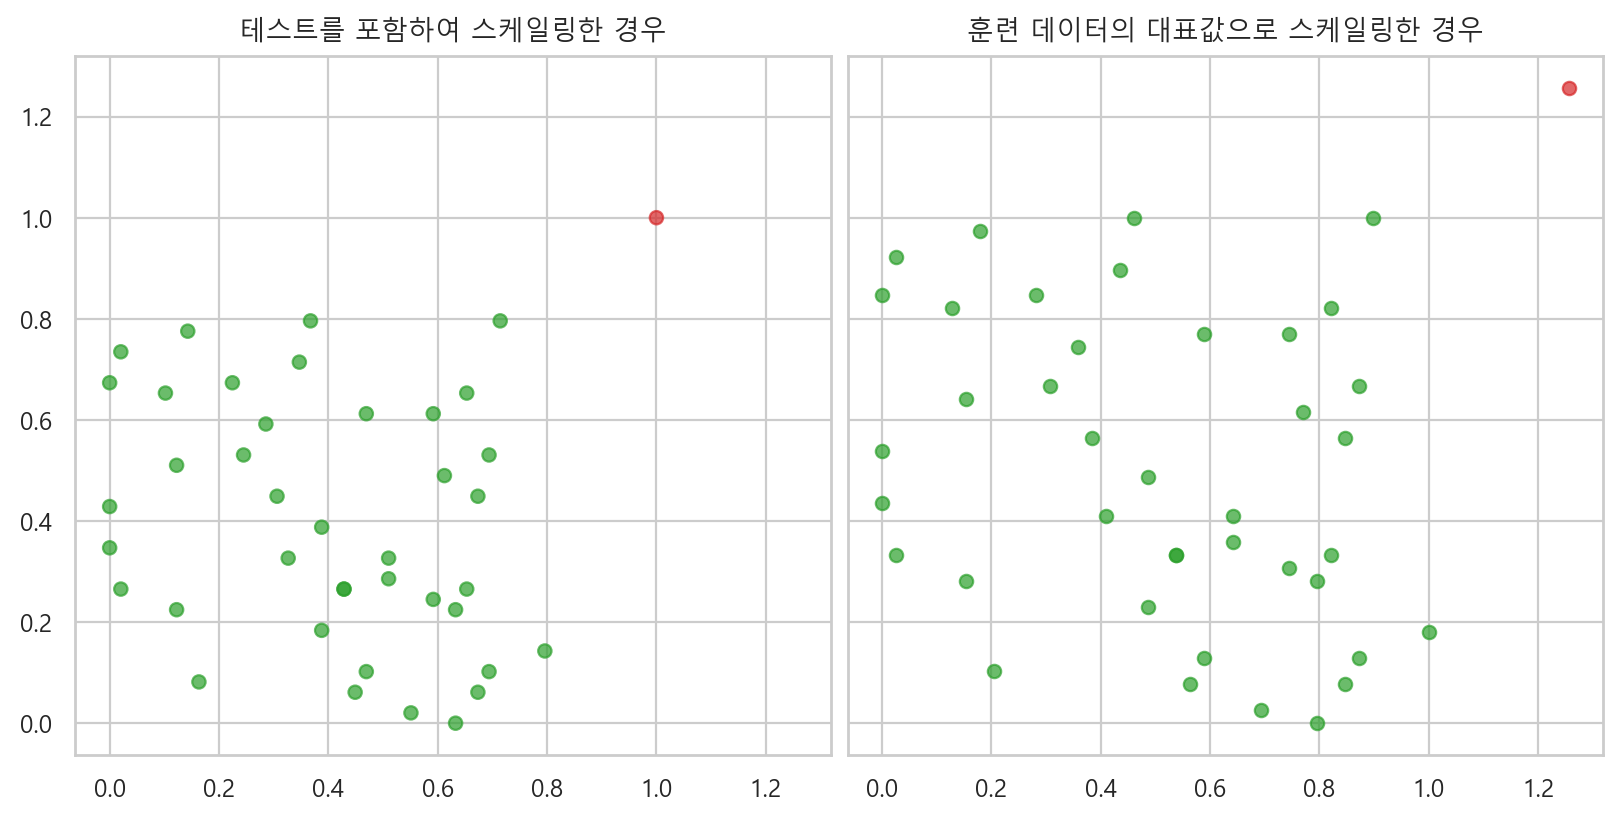

In [18]:
# 훈련 데이터의 스케일링 값이 변함.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,4), sharex = True, sharey = True)

ax1.scatter(x = all_scaling[:, 0],
            y = all_scaling[:, 1],
            alpha = 0.7,
            color = color)
ax1.set_title("테스트를 포함하여 스케일링한 경우")


ax2.scatter(x = train_scaling[:, 0],
            y = train_scaling[:, 1],
            alpha = 0.7, 
            color = "tab:green")
ax2.scatter(x = test_transform[:, 0],
            y = test_transform[:, 1],
            alpha = 0.7,
            color = "tab:red")
ax2.set_title("훈련 데이터의 대표값으로 스케일링한 경우")

pass

# 5. hr데이터를 PAC 해보기

In [19]:
from sklearn.decomposition import PCA

In [24]:
train = pd.read_csv("../data/hr_train_scaling.csv", encoding="utf-8", index_col = 0)
train.head(2)

,job_satisfaction,working_hours,num_companies_worked,age,years_at_company,salary_increasing_rate,department_hr,department_rnd,department_sales,marital_status_etc,marital_status_married,marital_status_single,attrition
1274,1.000000,0.356223,0.111111,0.309524,0.325,0.558212,0.0,0.0,1.0,0.0,1.0,0.0,0
1080,0.333333,0.858369,0.888889,0.666667,0.575,0.492676,0.0,0.0,1.0,0.0,1.0,0.0,0


In [25]:
feature_df = train[train.columns[1:6]]
feature_df.head()

,working_hours,num_companies_worked,age,years_at_company,salary_increasing_rate
1274,0.356223,0.111111,0.309524,0.325,0.558212
1080,0.858369,0.888889,0.666667,0.575,0.492676
1387,0.484979,0.000000,0.261905,0.150,0.468004
971,0.227468,0.333333,0.785714,0.725,0.653046
62,0.613734,0.555556,0.761905,0.725,0.494218


In [34]:
pca = PCA(n_components = 2).fit_transform(feature_df)

In [36]:
colors = {0 : "blue", 1: "red"}
c = train["attrition"].replace(colors)

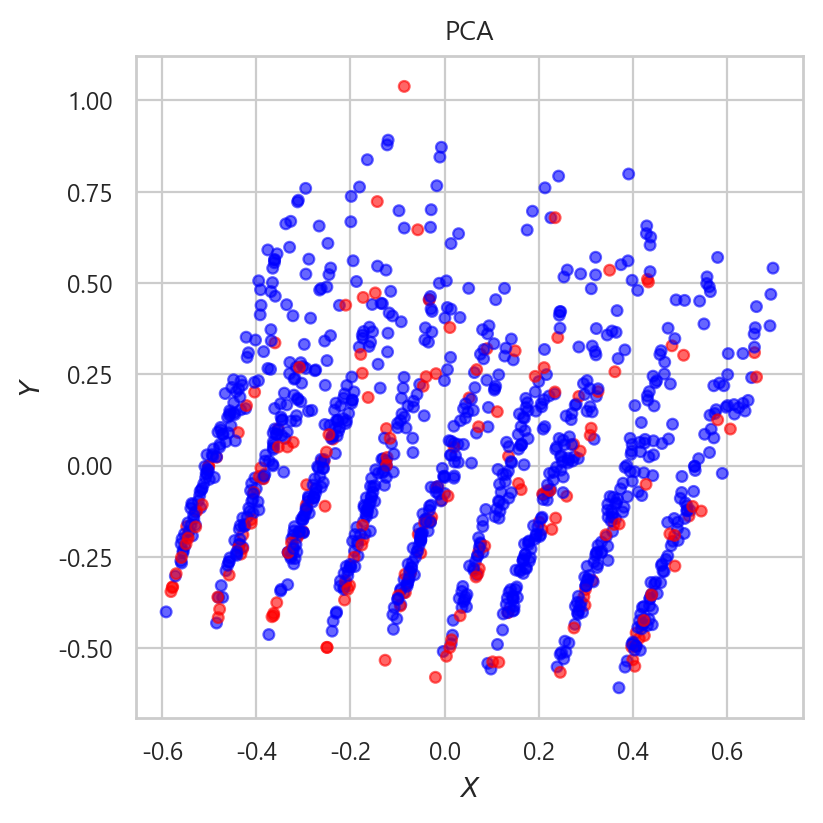

In [37]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(pca[:,0], pca[:,1], s = 15, alpha = 0.6, color=c)
ax.set(xlabel=R"$X$", ylabel=R"$Y$", title="PCA");